In [10]:
import pandas as pd
import gc
import requests
import os
import sys
import json


In [11]:
embed_human = pd.read_csv("../data/spose/embeddings_human_out.csv")
model_props = pd.read_csv("../data/model_properties/model_attributes_updated_v4.csv")

In [12]:
import os
import pandas as pd

# Folder path
folder_path = "../embed_proc_embed"

# Dictionary to hold DataFrames
embeddings_set = {}

# Loop through all files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        # Read CSV into a DataFrame
        df = pd.read_csv(file_path)
        # Use filename without extension as the key
        key = os.path.splitext(file)[0]
        embeddings_set[key] = df

# embeddings_set is now {filename_without_csv: DataFrame, ...}


In [14]:
###human embeddings postproc
ref_df = embeddings_set["model_triplet_output_flan-t5-large_THINGS_embedding"]
filtered = embed_human[embed_human["item"].isin(ref_df["item"])].copy()


embed_split = filtered["embedding"].str.strip().str.split(r"\s+")

# convert list-of-strings to a numpy array of floats
embed_array = np.array(embed_split.tolist(), dtype=float)

embed_df = pd.DataFrame(embed_array, columns=[f"dim_{i}" for i in range(embed_array.shape[1])])

embed_human = pd.concat([filtered[["item"]].reset_index(drop=True), embed_df], axis=1)

In [29]:
embeddings_set["model_triplet_output_OLMo-2-1124-13B_THINGS_embedding"]

,item,id,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,...,dim_20,dim_21,dim_22,dim_23,dim_24,dim_25,dim_26,dim_27,dim_28,dim_29
0,airbag,0,0.096734,0.088711,0.100449,0.092083,0.072496,0.002381,-0.042480,-0.001119,...,0.070550,0.066859,-0.017651,-0.037909,-0.092773,-0.138927,-0.036487,-0.099864,0.045196,-0.044172
1,album,1,0.015706,0.025248,-0.001974,-0.009358,-0.008539,-0.025937,0.044310,0.008352,...,0.051098,-0.005373,0.012027,-0.010345,-0.024291,0.005774,0.002850,-0.028797,0.042457,0.019131
2,appetizer,2,0.013981,-0.125055,0.053572,-0.134789,-0.114664,-0.095592,-0.070085,0.190048,...,0.070020,-0.153389,-0.003108,0.001389,-0.091093,-0.068210,-0.184477,0.052341,-0.030253,0.112094
3,applesauce,3,0.030143,-0.025528,0.022324,-0.021929,-0.032378,-0.034884,-0.000255,0.045834,...,0.025442,-0.025022,-0.027140,0.002991,-0.042256,-0.003471,-0.052622,0.026694,-0.029444,0.023690
4,backscratcher,4,-0.045574,0.022427,-0.024857,0.038276,0.017982,0.054188,-0.008511,-0.080593,...,-0.013393,0.036380,0.001111,0.029522,0.056624,0.006071,0.036719,-0.016245,0.038860,-0.027539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,veil,123,-0.191617,-0.246596,0.060088,-0.302880,-0.116809,0.251636,0.317549,-0.181112,...,-0.259021,-0.251311,-0.178600,-0.229061,-0.282235,-0.231360,0.209408,0.310125,-0.136579,0.350175
124,visor,124,0.010992,0.017309,0.050368,0.073925,0.088752,0.008013,0.148869,-0.136644,...,-0.148095,0.096316,0.078928,-0.125770,-0.118287,-0.041724,0.129664,0.022293,-0.021154,0.055910
125,volleyball,125,0.173164,0.188752,0.019858,0.094063,0.015047,-0.038563,0.120590,-0.099027,...,-0.024387,0.131934,-0.096623,0.147761,-0.175606,0.066653,-0.026726,-0.094531,0.110918,0.055193
126,waffle,126,0.010142,-0.014528,0.011717,-0.020674,-0.022198,-0.013819,0.002386,0.023669,...,0.009648,-0.018779,-0.010160,-0.002625,-0.023260,-0.009169,-0.023018,0.010301,-0.005279,0.015686


In [15]:
folder_path = "../embed_proc"

# Dictionary to hold DataFrames
raw_df_set = {}

# Loop through all files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        key = os.path.splitext(file)[0]  # filename without extension
        raw_df_set[key] = df

                                                model        r2
58  model_triplet_output_qwen25-14b-instruct_THING...  0.491798
55  model_triplet_output_Phi-3-medium-4k-instruct_...  0.468913
38  model_triplet_output_gemma-3-27b-it_THINGS_emb...  0.459731
27  model_triplet_output_qwen25-7b-instruct_THINGS...  0.459009
56  model_triplet_output_Phi-3.5-mini-instruct_THI...  0.457437
..                                                ...       ...
59        model_triplet_output_Yi-9B_THINGS_embedding  0.090551
40  model_triplet_output_gpt-oss-20b_THINGS_embedding  0.086543
13  model_triplet_output_gemma-3-270m-it_THINGS_em...  0.085273
61  model_triplet_output_mamba-1.4b-hf_THINGS_embe...  0.082597
39     model_triplet_output_gpt-j-6b_THINGS_embedding  0.024608

[67 rows x 2 columns]


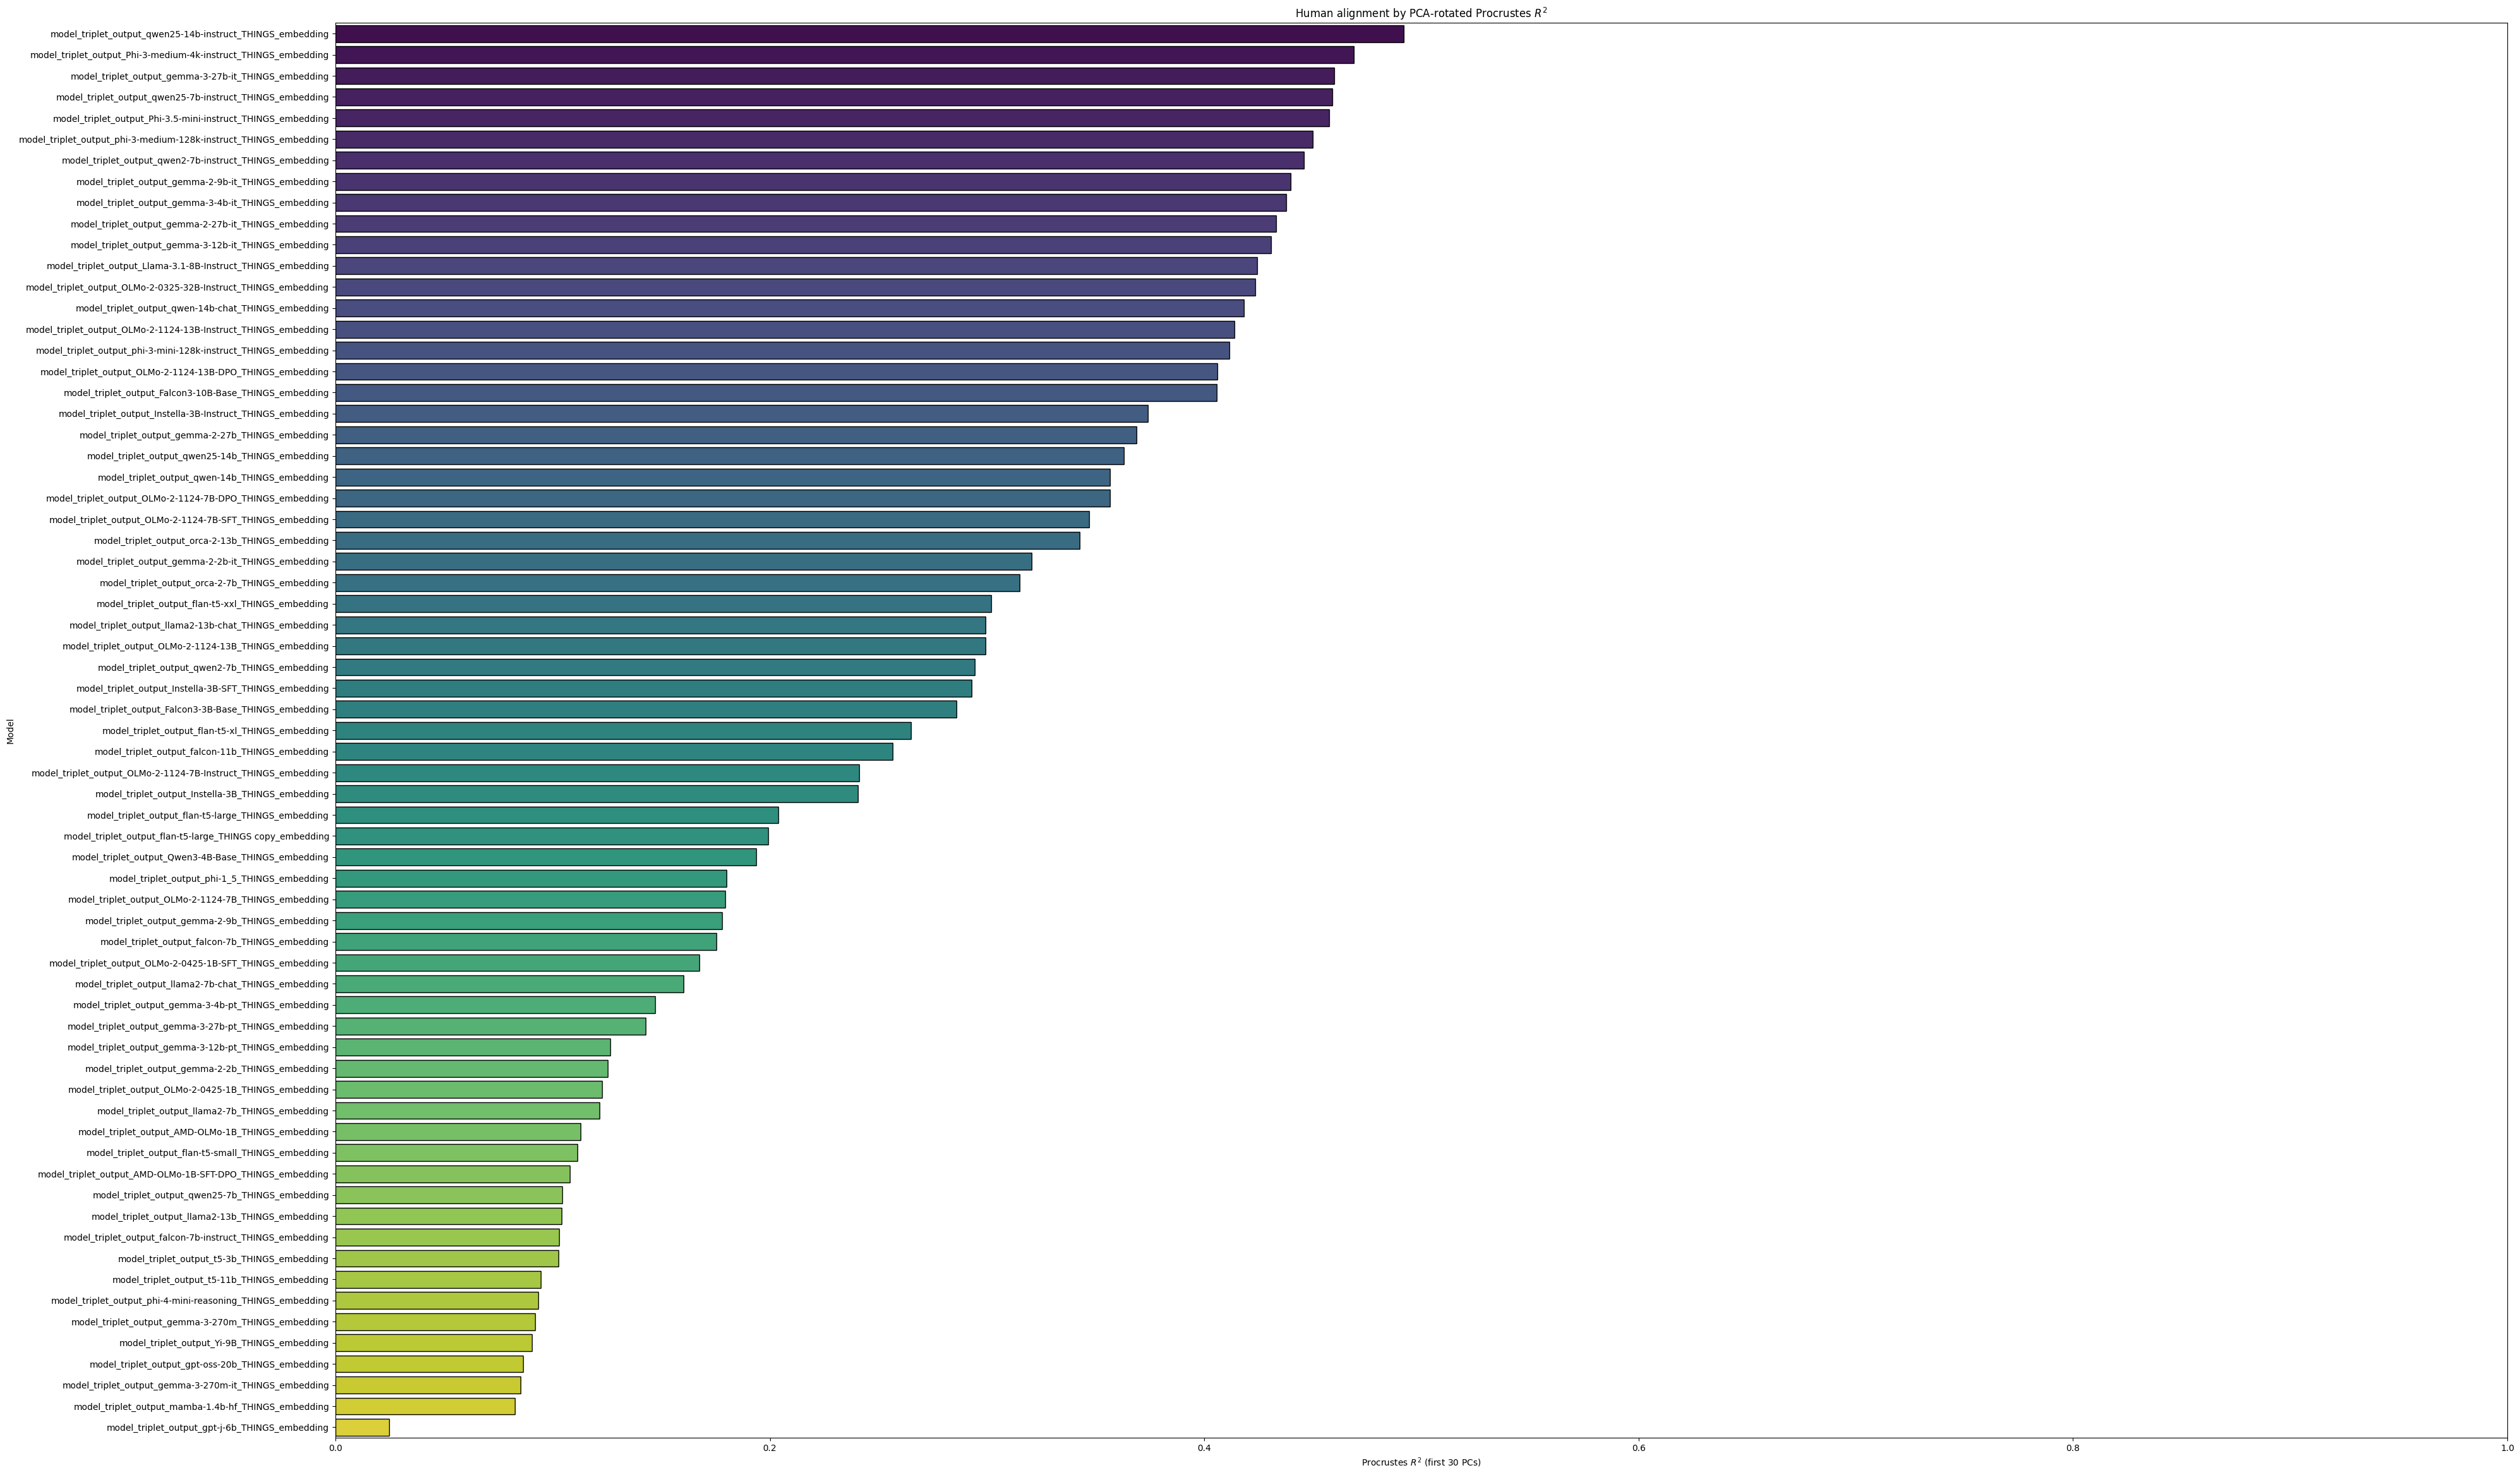

In [31]:
from sklearn.decomposition import PCA
from scipy.spatial import procrustes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------
# Helpers
# ------------------------
def procrustes_r2_spatial(X, Y):
    _, _, disparity = procrustes(X, Y)
    return float(np.clip(1.0 - float(disparity), 0.0, 1.0))

def _dim_cols(df: pd.DataFrame):
    cols = [c for c in df.columns if c.startswith("dim_")]
    return sorted(cols, key=lambda c: int(c.split("_")[1]))  # numeric order

def rotated_procrustes(df_human: pd.DataFrame, df_model: pd.DataFrame, n_dims: int, name=""):
    # 1) Ensure both have an "item" column (fallback to index if needed)
    if "item" not in df_human.columns:
        df_human = df_human.reset_index().rename(columns={df_human.index.name or "index": "item"})
    if "item" not in df_model.columns:
        df_model = df_model.reset_index().rename(columns={df_model.index.name or "index": "item"})

    # 2) Align items exactly
    shared = sorted(set(df_human["item"].tolist()) & set(df_model["item"].tolist()))
    if not shared:
        print(f"[NaN] {name}: no shared items")
        return np.nan

    # enforce same order
    A = df_human.set_index("item").loc[shared].reset_index()
    B = df_model.set_index("item").loc[shared].reset_index()

    # 3) Build matrices with numerically-sorted dim columns
    dimsA = _dim_cols(A)[:n_dims]
    dimsB = _dim_cols(B)[:n_dims]
    if len(dimsA) == 0 or len(dimsB) == 0:
        print(f"[NaN] {name}: no dim_ columns found")
        return np.nan

    X1 = A[dimsA].to_numpy()
    X2 = B[dimsB].to_numpy()

    # 4) Keep only rows that are finite in BOTH
    mask = np.isfinite(X1).all(axis=1) & np.isfinite(X2).all(axis=1)
    X1, X2 = X1[mask], X2[mask]

    # 5) Choose a single k used by BOTH PCAs
    k = min(n_dims, X1.shape[1], X2.shape[1], X1.shape[0], X2.shape[0])
    if k < 1 or X1.shape[0] < 2 or X2.shape[0] < 2:
        print(f"[NaN] {name}: k={k}, rows={X1.shape[0]}/{X2.shape[0]}")
        return np.nan

    # 6) PCA-rotate each space separately with the SAME k
    X1_rot = PCA(n_components=k, svd_solver="full").fit_transform(X1)
    X2_rot = PCA(n_components=k, svd_solver="full").fit_transform(X2)

    # 7) Procrustes on the rotated spaces
    return procrustes_r2_spatial(X1_rot, X2_rot)

# ------------------------
# Main loop
# ------------------------
n_dims = 30
rows = []

for key, model_df in embeddings_set.items():
    if key.lower() == "human":
        continue
    if not key.endswith("_embedding"):   # skip non-embedding dfs
        continue

    r2 = rotated_procrustes(embed_human, model_df, n_dims, name=key)
    rows.append({"model": key, "r2": r2})

r2_df = pd.DataFrame(rows).sort_values("r2", ascending=False)
print(r2_df)

# ------------------------
# Plot
# ------------------------
plt.figure(figsize=(40, max(3.5, 0.35 * len(r2_df))))
sns.barplot(
    data=r2_df, x="r2", y="model",
    hue="model", palette="viridis", edgecolor="black", legend=False
)
plt.xlim(0, 1)
plt.xlabel(f"Procrustes $R^2$ (first {n_dims} PCs)")
plt.ylabel("Model")
plt.title("Human alignment by PCA-rotated Procrustes $R^2$")
plt.tight_layout()
plt.show()


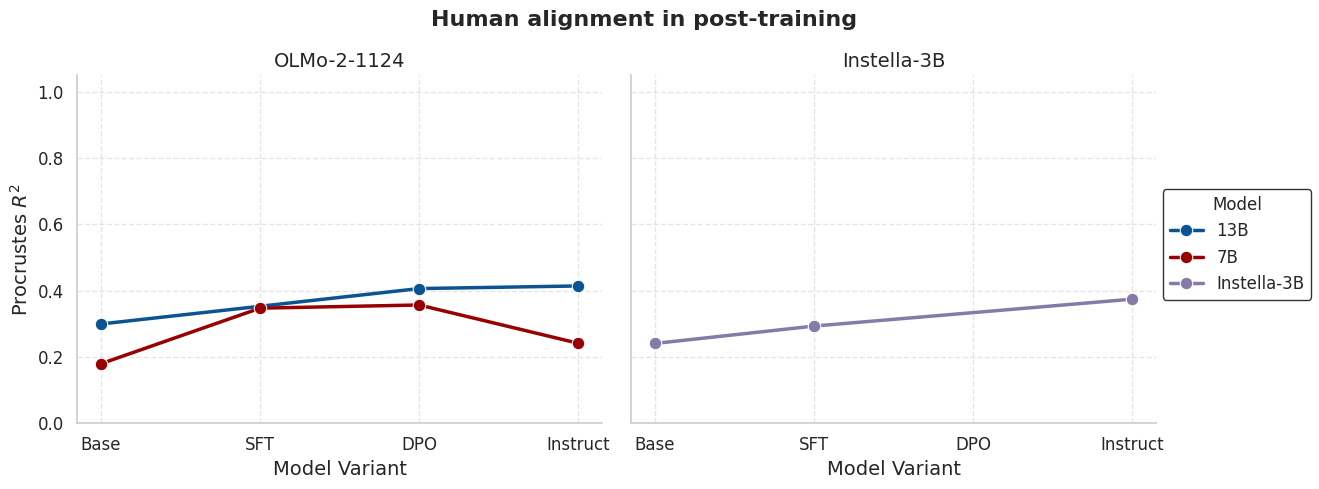

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- define models and variants ---
models = {
    "13B": {
        "Base":     "model_triplet_output_OLMo-2-1124-13B_THINGS_embedding",
        "SFT":      "model_triplet_output_OLMo-2-1124-13B-SFT_THINGS_embedding",
        "DPO":      "model_triplet_output_OLMo-2-1124-13B-DPO_THINGS_embedding",
        "Instruct": "model_triplet_output_OLMo-2-1124-13B-Instruct_THINGS_embedding",
    },
    "7B": {
        "Base":     "model_triplet_output_OLMo-2-1124-7B_THINGS_embedding",
        "SFT":      "model_triplet_output_OLMo-2-1124-7B-SFT_THINGS_embedding",
        "DPO":      "model_triplet_output_OLMo-2-1124-7B-DPO_THINGS_embedding",
        "Instruct": "model_triplet_output_OLMo-2-1124-7B-Instruct_THINGS_embedding",
    },
    "Instella-3B": {
        "Base":     "model_triplet_output_Instella-3B_THINGS_embedding",
        "SFT":      "model_triplet_output_Instella-3B-SFT_THINGS_embedding",
        "Instruct": "model_triplet_output_Instella-3B-Instruct_THINGS_embedding",
    }
}

# --- build plot dataframe ---
rows = []
for mod, variants in models.items():
    for variant, key in variants.items():
        if key in set(r2_df["model"]):
            val = r2_df.loc[r2_df["model"] == key, "r2"].values[0]
            group = "OLMo-2-1124" if mod in ["13B", "7B"] else "Instella-3B"
            rows.append({
                "model": mod,
                "group": group,
                "variant": variant,
                "r2": val
            })

plot_df = pd.DataFrame(rows)
plot_df["variant"] = pd.Categorical(
    plot_df["variant"], categories=["Base","SFT","DPO","Instruct"], ordered=True
)

# --- aesthetics ---
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.linewidth": 1.2,
})

palette = {
    "13B": "#0c5394",   # deep blue
    "7B":  "#990001",   # deep red
    "Instella-3B": "#867aa9",  # muted purple
}

# --- facet by group (OLMo vs Instella) ---
g = sns.FacetGrid(
    plot_df, col="group", sharey=True, height=5, aspect=1.2
)
g.map_dataframe(
    sns.lineplot,
    x="variant", y="r2", hue="model",
    marker="o", linewidth=2.5, markersize=9,
    palette=palette
)

# --- formatting ---
g.set_axis_labels("Model Variant", r"Procrustes $R^2$")
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    ax.set_ylim(0, 1.05)
    ax.grid(True, linestyle="--", alpha=0.5)

g.add_legend(title="Model", frameon=True, edgecolor="black")

sns.despine()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Human alignment in post-training", weight="bold", fontsize=16)

# --- Save as PDF ---
plt.savefig("posttraining.pdf", format="pdf", bbox_inches="tight")
